#**Data related position job salary prediction**

I have completed this project alone. In this project, I explorered features in the dataset that I retreived from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). Built couple of linear regression model for predicting salary. eventually, compared their performace side by side to determine which model performed the best for this prediction.

dataset link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries




1.   exploratiry data analysis
2.   data preprocessing
3.   model building



for the packages, I imported a few essential packages at the beginning such as pandas, numpy, and visulization packages. I will be import more packages later in the project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plot


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries.csv


In [ ]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# PART 1: DATA EXPLORATION

## 1.1 understanding dataset

In [ ]:
print("dupulicated column counts: ", df.duplicated().sum(),'\n')
print(df.info(), '\n')
print("unique value in each column: ")
print(df.nunique(), '\n')
print("nulls in the columns: ", '\n', df.isnull().sum())

dupulicated column counts:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None 

unique value in each column: 
Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4

In [ ]:
df.rename(columns = {'Unnamed: 0': 'ID'}, inplace= True)
#df.head()

In [ ]:
print("nulls in the columns: ")
print(df.isnull().sum())

nulls in the columns: 
ID                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## 1.2 explore feature

### 1.2.1 categorical feature

**here we examine each catagorical feature's relation between the predict variable which is salary.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

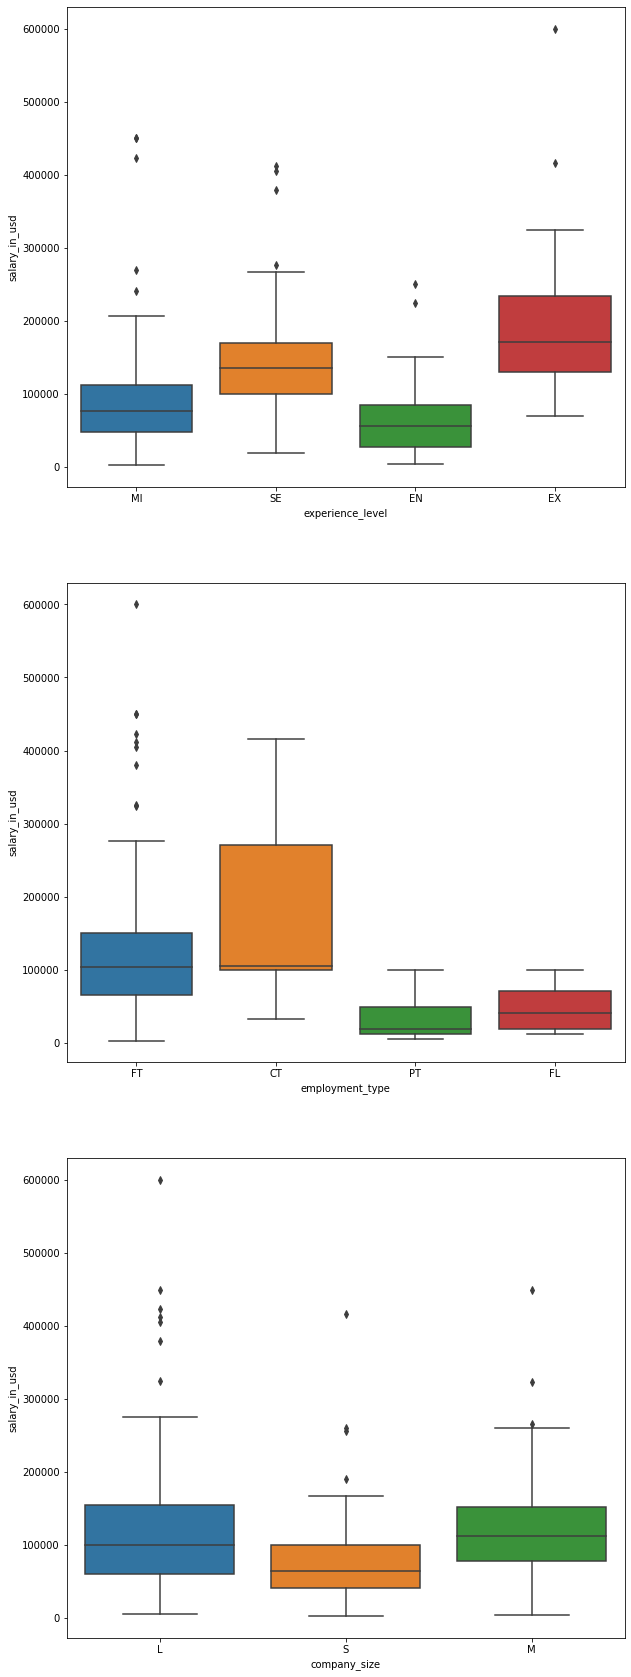

In [ ]:
_,position = plt.subplots(3, 1, figsize = [10,30])
sns.boxplot(x= 'experience_level', y = 'salary_in_usd', data = df, ax= position[0])
sns.boxplot(x= 'employment_type', y = 'salary_in_usd', data = df, ax= position[1])
#sns.boxplot(x= 'job_title', y = 'salary_in_usd', data = df, ax= position[0][2])
#sns.boxplot(x= 'salary_currency', y = 'salary_in_usd', data = df, ax= position[1][0])
#sns.boxplot(x= 'employee_residence', y = 'salary_in_usd', data = df, ax= position[1][1])
#sns.boxplot(x= 'company_location', y = 'salary_in_usd', data = df, ax= position[1][2])
sns.boxplot(x= 'company_size', y = 'salary_in_usd', data = df, ax= position[2])

a quick explanation of each acronym

graph 1: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

graph 2: PT Part-time FT Full-time CT Contract FL Freelance

graph 3: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


---


**based on the whisker plot, it is obvious that there are some outliers in the graph.**

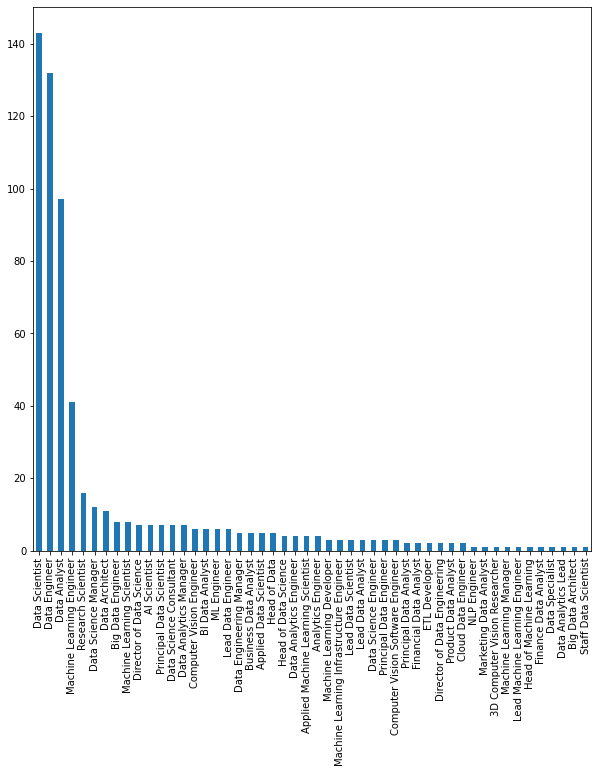

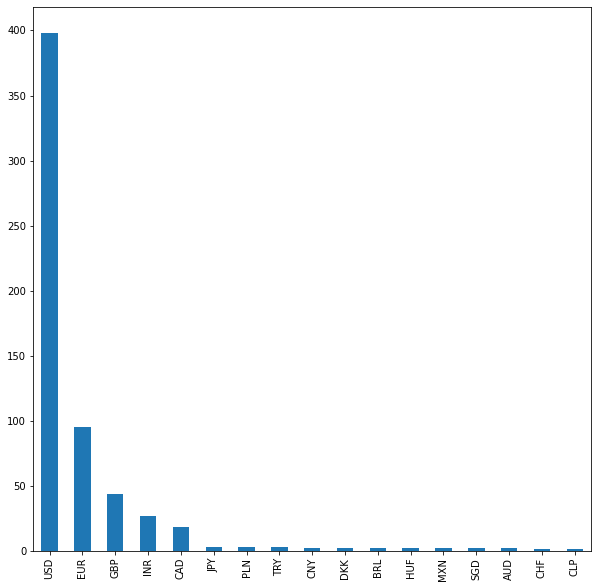

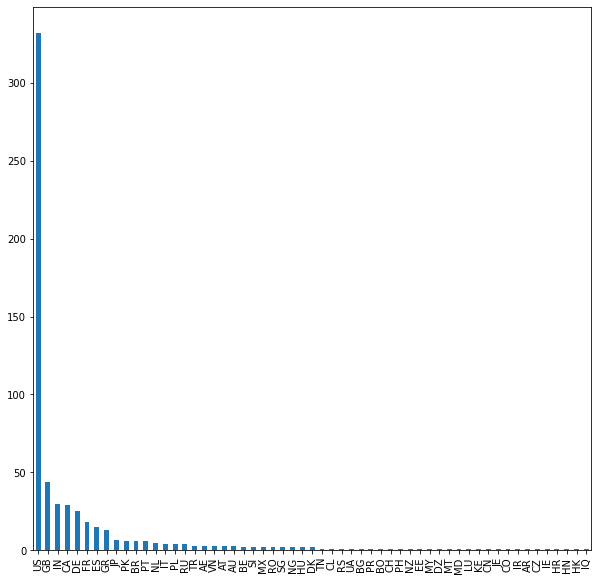

<Axes: >

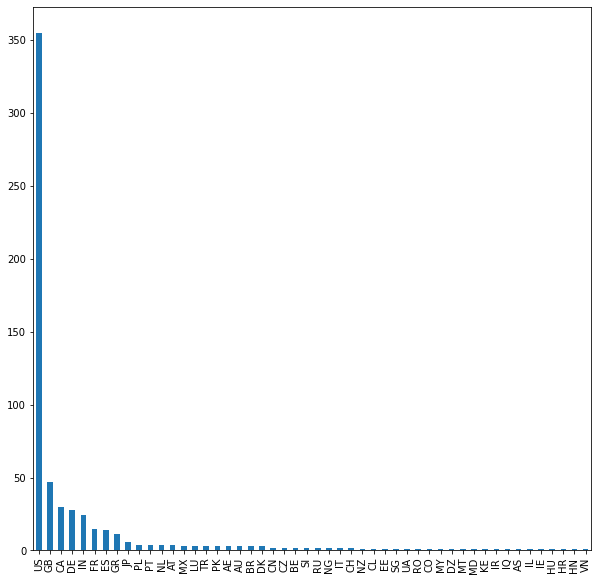

In [ ]:
#job title
job_title_split = df['job_title'].str.get_dummies(sep = ',').sum()
#print(job_title_split)
job_title_split.sort_values(ascending= False).plot.bar(figsize = [10, 10])
plt.show()

#salary_currency
salary_currency_split = df['salary_currency'].str.get_dummies(sep = ',').sum()
#print(salary_currency_split)
salary_currency_split.sort_values(ascending= False).plot.bar(figsize = [10, 10])
plt.show()

#employee_residence
employee_residence_split = df['employee_residence'].str.get_dummies(sep = ',').sum()
#print(employee_residence_split)
employee_residence_split.sort_values(ascending= False).plot.bar(figsize = [10, 10])
plt.show()

#company_location
company_location_split = df['company_location'].str.get_dummies(sep = ',').sum()
#print(company_location_split)
company_location_split.sort_values(ascending= False).plot.bar(figsize = [10, 10])


based on these 4 figures, 

*   Most of the data collected are from Data science, Data engineer, and Data analyst

*   most of the value in company size, employee residence, currency were from US.


### 1.2.2 numerical feature

**here we are examine the numerical varibale to the dependent variable, salary in usd, through correlation.

<Axes: >

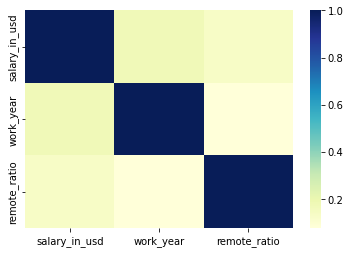

In [ ]:
corrfeature = df[['salary_in_usd', 'work_year', 'remote_ratio']].corr()
sns.heatmap(corrfeature, cmap= 'YlGnBu')

In [ ]:
corrfeature

,salary_in_usd,work_year,remote_ratio
salary_in_usd,1.000000,0.170493,0.132122
work_year,0.170493,1.000000,0.076314
remote_ratio,0.132122,0.076314,1.000000


**based on the correlation examed, each numerical features have no high correlation with dependent variable, which is a good thing. because it can all be used as independent variable to predict dependent variable.**

*high correlation with dependent variable can cause bise in the result, which lead prediction result

## PART 3 preprocessing dataset

### 3.1 dropping cloumn

In [ ]:
to_drop = ['ID', 'salary', 'salary_currency']
df_temp = df.drop(to_drop, axis = 1)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


### 3.2 categorical feature

here I am using label encoding to convert categorical features to numerical features.

what is label encoding you may ask? well, here is an example

*  suppose you have a dataset that contains a categorical feature like "color," which can take values such as "red," "green," and "blue." To convert this feature into numerical format using label encoding, you would assign the value 0 to "red," 1 to "green," and 2 to "blue." Now, the "color" feature can be used as input to machine learning algorithms that require numerical data.

In [ ]:
#label encoding: experience level, company size, employment_type
from sklearn.preprocessing import LabelEncoder
label_cate = df_temp.filter(['experience_level', 'company_size', 'employment_type', 'remote_ratio'], axis = 1)


company_size_order = ['S', 'M', 'L']
experience_level_order = ['EN', 'MI', 'SE', 'EX']
remote_ratio_order = [0,50,100]

def order_labels(df, col, order):
  df[col] = df[col].astype('category')
  df[col] = df[col].cat.reorder_categories(order, ordered = True)
  df[col] = df[col].cat.codes.astype(int)
  

order_labels(label_cate, 'company_size', company_size_order)
order_labels(label_cate, 'experience_level', experience_level_order)
order_labels(label_cate, 'remote_ratio', remote_ratio_order)

label_encoder = LabelEncoder()
label_cate['employment_type'] = label_encoder.fit_transform(label_cate['employment_type'])

#label_cate.head() # if want to see thhe result, delete the first #

,experience_level,company_size,employment_type,remote_ratio
0,1,2,2,0
1,2,0,2,0
2,2,1,2,1
3,1,0,2,0
4,2,2,2,1


In [ ]:

def encoder(df, colname, enc):
  
  for i in colname:
    df[i] = enc.fit_transform(df[i])
  
  return df

label_encoder = preprocessing.LabelEncoder()
colname = ['company_location', 'employee_residence', 'job_title', 'work_year']
df_temp = encoder(df_temp, colname, label_encoder)

#df_temp.head()    # if want to see thhe result, delete the first #

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,MI,FT,22,79833,14,0,12,L
1,0,SE,FT,41,260000,32,0,29,S
2,0,SE,FT,7,109024,20,50,18,M
3,0,MI,FT,47,20000,23,0,20,S
4,0,SE,FT,38,150000,55,50,48,L


In [ ]:
'''
#one hot encoding: company_location, employee_residence, job_title

from sklearn.preprocessing import OneHotEncoder

def encoder(df, categories, enc):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns= enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop= True), transformed], axis = 1).drop(categories, axis= 1)

categories = ['company_location', 'employee_residence', 'job_title', 'work_year']
encoder_ohe = OneHotEncoder()
encoder_ohe.fit(df_temp[categories])


df_temp = encoder(df_temp, categories, encoder_ohe)
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#concat label encoder, drop the original
org_col = ['experience_level', 'company_size', 'employment_type']
new_df = pd.concat([df_temp,label_cate], axis = 1).drop(org_col, axis = 1)

new_df.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,remote_ratio
0,0,22,79833,14,0,12,0
1,0,41,260000,32,0,29,0
2,0,7,109024,20,50,18,1
3,0,47,20000,23,0,20,0
4,0,38,150000,55,50,48,1


### 3.3 train test split

In [ ]:
from tables import Column
y = new_df['salary_in_usd']
X = new_df.drop('salary_in_usd', axis = 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_copy = X.copy()
X_column = X.columns
#copy_df.head()

X_copy = pd.DataFrame(scaler.fit_transform(X_copy), columns = X.columns)
X_copy.head()

,work_year,job_title,employee_residence,remote_ratio,company_location,remote_ratio
0,0.0,0.448980,0.250000,0.0,0.244898,0.0
1,0.0,0.836735,0.571429,0.0,0.591837,0.0
2,0.0,0.142857,0.357143,0.5,0.367347,0.5
3,0.0,0.959184,0.410714,0.0,0.408163,0.0
4,0.0,0.775510,0.982143,0.5,0.979592,0.5


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.15, random_state = 5)

##Part 4 training model

**1. model used:**

*   lasso
*   RIDGE
*   RandomForest Regressor

  **Hyperparameteer tuning:**

  *   RIDGE and LASSO
      *   iterate for best ALPHA value
  *   RandomForest Regressor
      *   Grid search

**2. metrics used for performance comparsion:**


*   MSE
*   RMSE
*   R-SQUARED


**3. feature importance comparsion**


### 4.1 lasso regression

<ipython-input-66-1c6c37ba3965>:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(lr_train_x, lr_train_y)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.538e+11, tolerance: 2.023e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


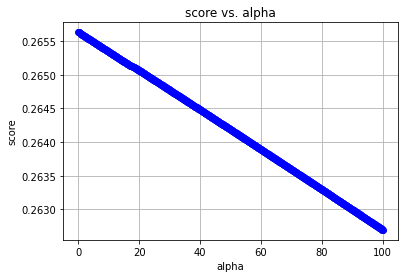

The optimaized alpha and score of Lasso linear is: 


(None, 0.0, 0.2656300340181046)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score #not used
from math import sqrt

lr_train_x, lr_validate_x, lr_train_y, lr_validate_y = train_test_split(x_train, y_train, test_size=0.15, random_state = 0)

alphas = np.linspace (0, 100, num=1000)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso #optional code

plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score

In [ ]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(x_train, y_train)

Lasso(alpha=0.20040080160320642)

### 4.2 ridge regression

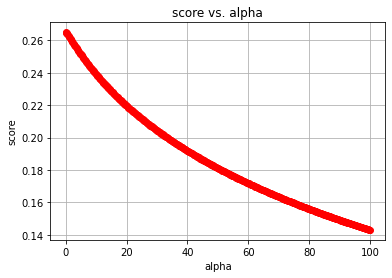

The optimaized alpha and score of Ridge linear is: 


(None, 0.20040080160320642, 0.2650255932864626)

In [ ]:
alphas = np.linspace (0, 100, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge #optional code
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(x_train, y_train)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=0.20040080160320642)

### Part 4.3 random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=2,max_features='sqrt')
param_grid={'n_estimators':[63,64,65,66,67,68,69,70,71],'max_depth':[15,16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
clf.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=2),
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21],
                         'n_estimators': [63, 64, 65, 66, 67, 68, 69, 70, 71]})

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 18, 'n_estimators': 65}
0.38729472845675705


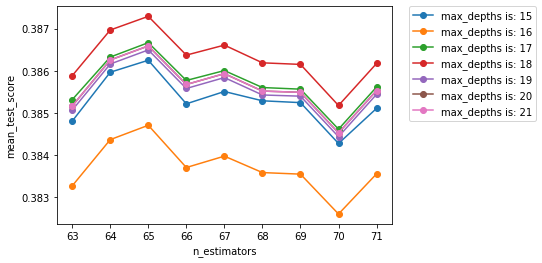

the best parameter for max_depth is: 18
the best parameter for n_estimators is: 65


In [ ]:
max_depth=[15,16,17,18,19,20,21]   
n_estimators=[63,64,65,66,67,68,69,70,71]   
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
  #(x = n_estimators, y = score[i] ,'-o',label)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))


## Part 4: Model evaluation

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error
lasso=Lasso(alpha=model1_para)
lasso.fit(x_train, y_train)
pred_y=lasso.predict(x_test)
lasso_score=lasso.score(x_test, y_test)
MSE_lasso=mean_squared_error(y_test, pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.25840806306771913
Mean square error of lasso:  3759008975.1377816
Root mean squared error of lasso: 61310.757417746696


<ipython-input-75-e888b6c0669b>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.570e+11, tolerance: 2.583e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.metrics import  mean_squared_error
ridge=Ridge(alpha=model3_para)
ridge.fit(x_train, y_train)
pred_y=ridge.predict(x_test)
ridge_score=ridge.score(x_test,y_test)
MSE_ridge=mean_squared_error(y_test,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.2583020478756429
Mean square error of ridge:  3759546348.9125886
Root mean squared error of ridge: 61315.13963869436


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
rf_score=rf.score(x_test,y_test)
MSE_rf=mean_squared_error(y_test,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.29543873818436117
Mean square error of rf:  3571306502.6774054
Root mean squared error of rf: 59760.40915754682


### 4.2 model evaluation

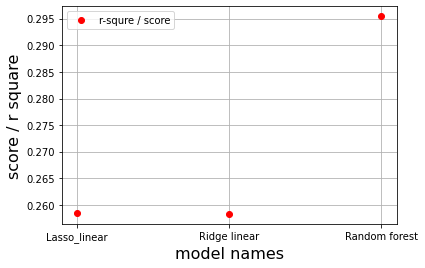

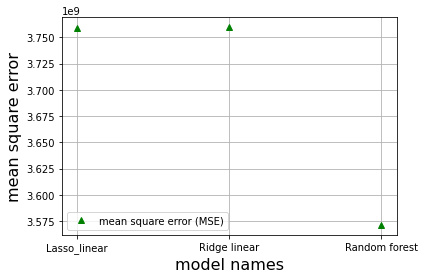

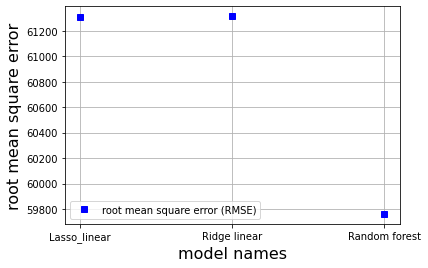

In [ ]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

Here, based on the plot, all three model were preformed badly. 

Randomforest Regressor performned the best among all three models with highest ACCURACY SCORE, and LOWEST ROOT MEAN SQUARED ERROR score. 

there are couple reasons that might cuase prediction model to perform badly: lack of enough data, quality of data, irrelevent feature, and overfit/underfit

> In this case, lack of data might be the main reason that it performned badly. 

> since the model performed badly and the size of this dataset is relativly small with only 606 records and 9 columns. So, it is possible that with larger quantity of data to train the model, the result of prediction power would be better.



### 4.3 feature importance

**I based on the best performing prediction model to examine the importance of each feature.**

**here I found that position, employee location, and company location are the three most important factors that affect one's salary.**

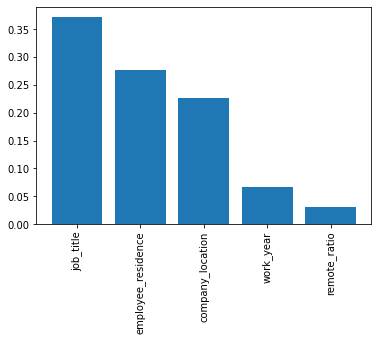

In [ ]:
importances = rf.feature_importances_
feature_name = x_train.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()